In my cool journey to try to understand that blood  equation I will use the examples that God gave us...and the examples given here to: https://nbviewer.org/github/barbagroup/CFDPython/blob/master/lessons/01_Step_1.ipynb 

In [1]:
# Remember: comments in python are denoted by the pound sign
import numpy                       #here we load numpy
from matplotlib import pyplot      #here we load matplotlib
import time, sys                   #and load some utilities

In [2]:
nx = 41  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 25    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)
c = 1      #assume wavespeed of c = 1

In [3]:
u = numpy.ones(nx)      #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


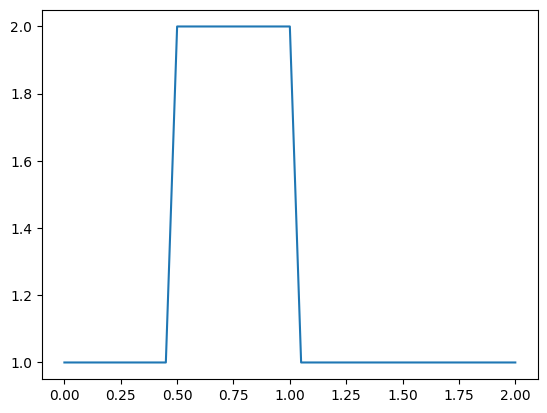

In [4]:
pyplot.plot(numpy.linspace(0, 2, nx), u);

Why doesn't the hat function have perfectly straight sides? Think for a bit.

Now it's time to implement the discretization of the convection equation using a finite-difference scheme.

For every element of our array u, we need to perform the operation un+1i=uni−cΔtΔx(uni−uni−1)
We'll store the result in a new (temporary) array un, which will be the solution u for the next time-step. We will repeat this operation for as many time-steps as we specify and then we can see how far the wave has convected.

We first initialize our placeholder array un to hold the values we calculate for the n+1 timestep, using once again the NumPy function ones().

Then, we may think we have two iterative operations: one in space and one in time (we'll learn differently later), so we'll start by nesting one loop inside the other. Note the use of the nifty range() function. When we write: for i in range(1,nx) we will iterate through the u array, but we'll be skipping the first element (the zero-th element). Why?

In [ ]:
un = numpy.ones(nx) #initialize a temporary array

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx): ## you can try commenting this line and...
    #for i in range(nx): ## ... uncommenting this line and see what happens!
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])